# Preprocessing

## Importing Modules

In [1]:
pip install dtreeviz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.svm import SVR
import seaborn as sns
from sklearn.decomposition import PCA

## Importing Dataset

In [3]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Missing Values

In [5]:
df.isna().any().any()

False

## Encoding String Values

In [6]:
#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Separating Features from Output

In [8]:
Y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

## Train-Test-Split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

## PCA

[0.15874097 0.06256099 0.06008698 0.05522367 0.05412434 0.03884033
 0.03834965 0.03736152 0.03709998 0.03574152 0.03476871 0.03375795
 0.03291837 0.03272874 0.03189664 0.03163407 0.03047758 0.0292106
 0.02877436 0.02679063 0.02377621 0.01766946 0.01694708 0.01087819
 0.01022026 0.00925704 0.00742241 0.00651373 0.0046393  0.00158874]
Two PCs explain 99.99999999999997 % of variance cumulatively


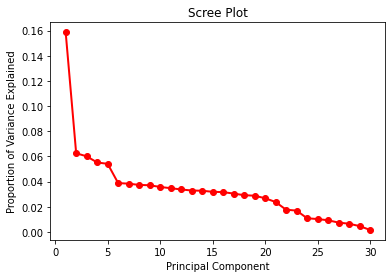

In [10]:
from sklearn.preprocessing import StandardScaler
pca = PCA(random_state=0)
principalComponents = pca.fit_transform(StandardScaler().fit_transform(X_train))
print(pca.explained_variance_ratio_)
print('Two PCs explain', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

[6.99226087e-01 2.98479426e-01 2.28558403e-03 5.58278040e-06
 9.75429210e-07 8.89410139e-07 6.24639517e-07 1.82933246e-07
 1.56669816e-07 8.34380567e-08 8.08478320e-08 6.89875418e-08
 5.54055910e-08 4.95825979e-08 2.47882785e-08 2.16114379e-08
 1.69205987e-08 1.58166351e-08 1.52861606e-08 1.38219307e-08
 1.25880825e-08 7.00170580e-09 6.56911612e-09 5.72564528e-09
 3.23006764e-09 2.75889346e-09 2.58840574e-09 2.16198437e-09
 1.29634676e-09 6.85709955e-10]
Two PCs explain  99.99999999999999 % of variance cumulatively


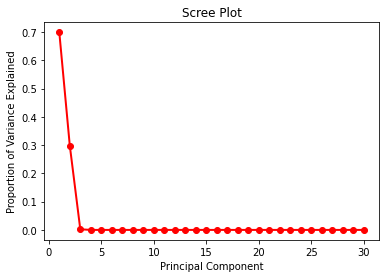

In [11]:
pca = PCA(random_state=0)
principalComponents = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
print('Two PCs explain ', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

[0.69922609 0.29847943]
Two PCs explain  99.77055129969716 % of variance cumulatively


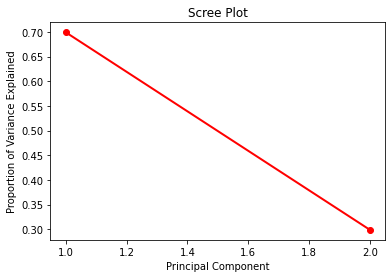

In [12]:
pca = PCA(n_components=2, random_state=0)
principalComponents = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
print('Two PCs explain ', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [13]:
import plotly.express as px
fig = px.scatter(principalComponents, x=0, y=1, color=y_train)
fig.show()
X_train = principalComponents
X_test = pca.transform(X_test)

# Decision Tree

### Import Modules

In [14]:
import graphviz
from subprocess import check_call
from IPython.display import Image
from dtreeviz.trees import dtreeviz
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, plot_tree, _tree
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, log_loss
import matplotlib.font_manager

## Decision Tree Classifier

Function to Visualize Decision Tree Model

In [15]:
def decision_tree_maker(X_train, Y_train, X_test, Y_test, my_depth = 5):

  # train model
  dt = DecisionTreeClassifier(random_state = 0, max_depth = my_depth, criterion='entropy')
  dt.fit(X_train, Y_train)

  # test model 
  Y_pred = dt.predict(X_test)
  # metric evaluation
  dt_accuracy = accuracy_score(Y_test, Y_pred)
  print('Acuuracy = ', dt_accuracy)
  dt_f1 = f1_score(Y_test, Y_pred)
  print('F1 Score = ', dt_f1)
  dt_precision = precision_score(Y_test, Y_pred)
  print('Precision = ', dt_precision)
  dt_recall = recall_score(Y_test, Y_pred)
  print('Recall = ', dt_recall)
  dt_confusion_matrix = confusion_matrix(Y_test, Y_pred)
  print('Confusion Matrix:\n', dt_confusion_matrix)

  # features = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',  'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',  'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',  'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
  features = ['PC1', 'PC2']
  classes = ['No', 'Yes']

  # text representation of decision tree
  text_representation = export_text(dt, feature_names=features)
  print('------------ Text Representation of Decision Tree ----------')
  print(text_representation)

  np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
  # graphical represenation of decision tree, save to file 'decision_tree.png'
  dot_data = export_graphviz(dt, out_file ='tree.dot', feature_names=features, class_names=classes)
  check_call(['dot','-Tpng','tree.dot','-o','decision_tree.png'])

  # decision tree detailed visualisation
  viz = dtreeviz(dt, X_train, Y_train, target_name="Attrition Rate",feature_names=features, class_names=classes)
  return viz

### Train and Test Decision Tree Model

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


Acuuracy =  0.8401360544217688
F1 Score =  0.1754385964912281
Precision =  0.35714285714285715
Recall =  0.11627906976744186
Confusion Matrix:
 [[242   9]
 [ 38   5]]
------------ Text Representation of Decision Tree ----------
|--- PC2 <= -3256.56
|   |--- PC2 <= -4468.28
|   |   |--- PC1 <= 12087.48
|   |   |   |--- PC1 <= 10827.89
|   |   |   |   |--- class: 1
|   |   |   |--- PC1 >  10827.89
|   |   |   |   |--- class: 0
|   |   |--- PC1 >  12087.48
|   |   |   |--- class: 1
|   |--- PC2 >  -4468.28
|   |   |--- PC1 <= -10496.08
|   |   |   |--- PC1 <= -11422.14
|   |   |   |   |--- class: 0
|   |   |   |--- PC1 >  -11422.14
|   |   |   |   |--- class: 1
|   |   |--- PC1 >  -10496.08
|   |   |   |--- PC2 <= -3265.53
|   |   |   |   |--- class: 0
|   |   |   |--- PC2 >  -3265.53
|   |   |   |   |--- class: 1
|--- PC2 >  -3256.56
|   |--- PC2 <= 6724.97
|   |   |--- PC2 <= 860.30
|   |   |   |--- PC2 <= 217.75
|   |   |   |   |--- class: 0
|   |   |   |--- PC2 >  217.75
|   |   |   |

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


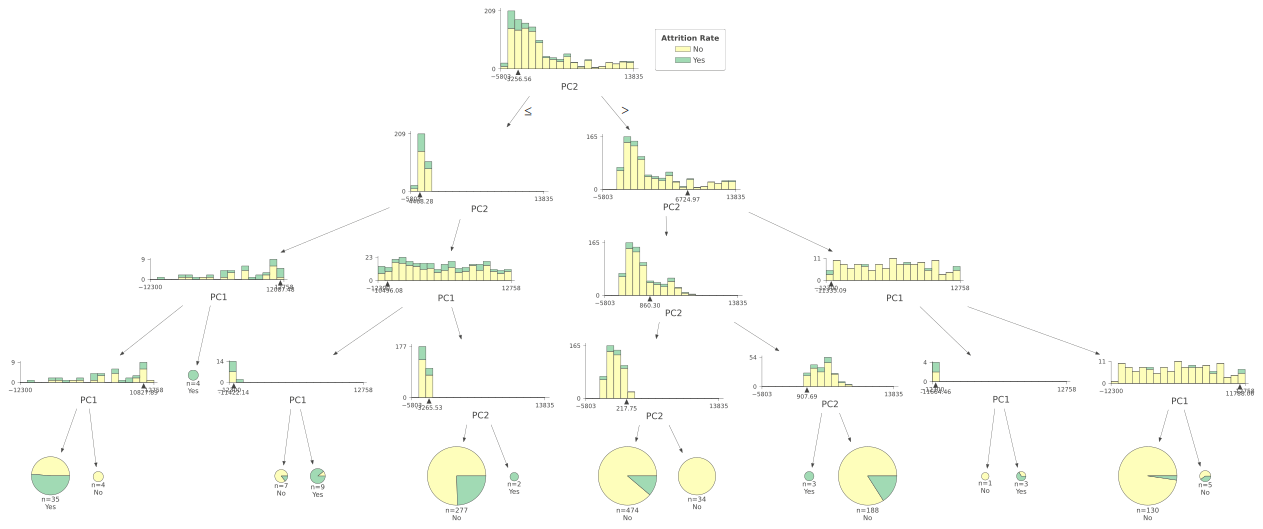

In [16]:
decision_tree_maker(X_train, y_train, X_test, y_test, 4)

Visualize Decision Tree Model

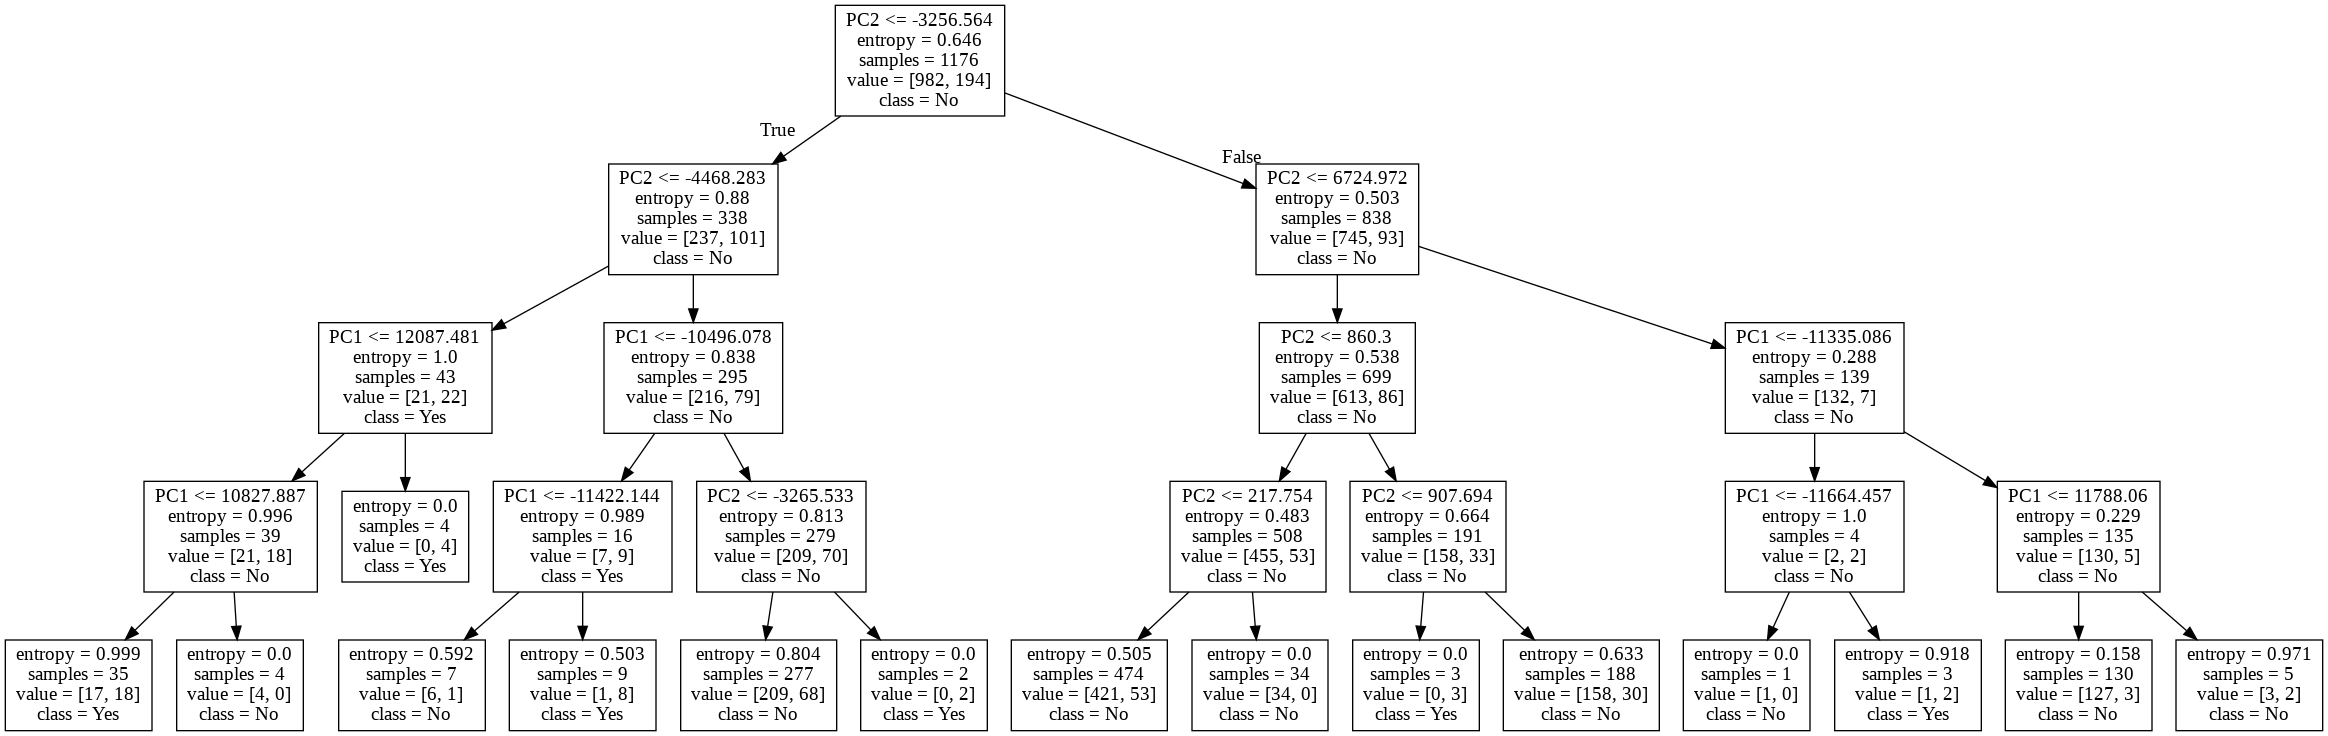

In [17]:
 # graphical represenation of decision tree, view file 'decision_tree.png'
 Image('decision_tree.png')

## Hyperparameter Tuning using GridSearch CV 

Analyzing Accuracy with Depth of Decision Tree

[]

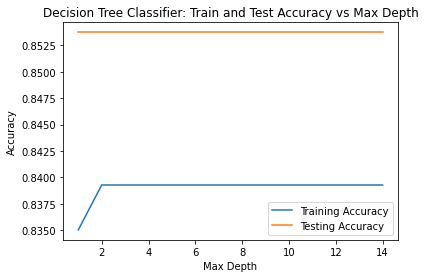

In [18]:
dt_train_accuracy = []
dt_test_accuracy = []

# do GridSearch CV over different values
for i in np.arange(1, 15):
  param_grid = {'criterion':['entropy','gini'],'max_depth': [i],'max_leaf_nodes':[5, 10, 20, 50, 100],'random_state':[0]}
  dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
  dt.fit(X_train,y_train)
  y_train_pred = dt.predict(X_train)
  y_pred = dt.predict(X_test)
  s = accuracy_score(y_train, y_train_pred)
  dt_train_accuracy.append(s)
  dt_test_accuracy.append(accuracy_score(y_test, y_pred))

# plot graph
plt.title("Decision Tree Classifier: Train and Test Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(np.arange(1,15), dt_train_accuracy, label="Training Accuracy")
plt.plot(np.arange(1,15), dt_test_accuracy, label="Testing Accuracy")
plt.legend()
plt.plot()

In [19]:
# print values at max depth = 4
print('Train Accuracy at max depth = 4 : ', dt_train_accuracy[3])
print('Test Accuracy at max depth = 4 : ', dt_test_accuracy[3])

Train Accuracy at max depth = 4 :  0.8392857142857143
Test Accuracy at max depth = 4 :  0.8537414965986394


Function for Grid Search CV

In [20]:
# performing GridSearchCV on data to get best model hyperparameters
def gcv(X_train, Y_train, X_test, Y_test):

  # make scorer
  scoring = make_scorer(accuracy_score)

  # define parameters
  max_depth = [int(x) for x in np.linspace(2, 15, num=10)] 
  # max_depth.append(None)

  # perform GridSearchCV with given parameters
  g_cv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                param_grid={'criterion': ['gini', 'entropy'],
                            'max_depth': max_depth,
                            'max_features': ['auto', 'log2', 'sqrt', 0.33334],
                            'min_samples_leaf': [1, 2, 5, 10, 15, 20],
                            'min_samples_split': range(2, 10),
                            'max_leaf_nodes': [5, 10, 20, 50, 100],
                            'random_state': [0]},
                scoring=scoring, cv=5, refit=True)

  g_cv.fit(X_train, Y_train)

  # get best parameter values
  print(g_cv.best_params_)

  # train new model with best parameters
  dt_classifier = DecisionTreeClassifier(**g_cv.best_params_).fit(X_train, Y_train)
  Y_pred = dt_classifier.predict(X_test)
  dt_accuracy = accuracy_score(Y_test, Y_pred)
  print('Accuracy = ', dt_accuracy)
  dt_f1 = f1_score(Y_test, Y_pred)
  print('F1 Score = ', dt_f1)
  dt_precision = precision_score(Y_test, Y_pred)
  print('Precision = ', dt_precision)
  dt_recall = recall_score(Y_test, Y_pred)
  print('Recall = ', dt_recall)
  return dt_classifier, g_cv.best_params_, dt_accuracy

Run Grid Search CV

In [ ]:
dt_classifier, best_params_raw, accuracy_cv = gcv(X_train, y_train, X_test, y_test)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 0}
Accuracy =  0.8605442176870748
F1 Score =  0.1276595744680851
Precision =  0.75
Recall =  0.06976744186046512


### Visualizing Decision Tree Model 

Decision Tree Model with Best Parameters

Accuracy =  0.8605442176870748
F1 Score =  0.1276595744680851
Precision =  0.75
Recall =  0.06976744186046512


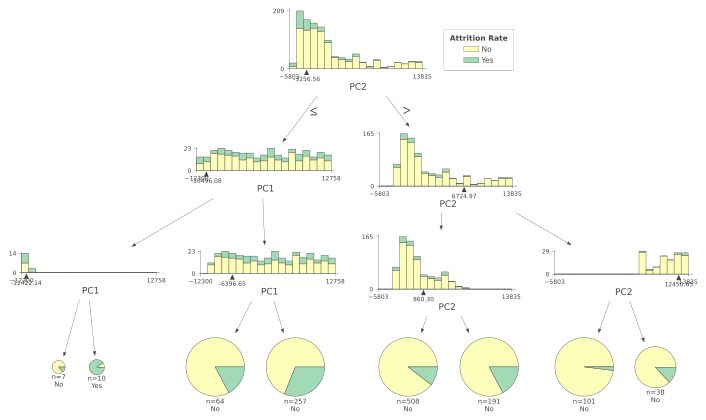

In [ ]:
# train new model with best parameters
dt_classifier = DecisionTreeClassifier(**best_params_raw).fit(X_train, y_train)
Y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, Y_pred)
print('Accuracy = ', dt_accuracy)
dt_f1 = f1_score(y_test, Y_pred)
print('F1 Score = ', dt_f1)
dt_precision = precision_score(y_test, Y_pred)
print('Precision = ', dt_precision)
dt_recall = recall_score(y_test, Y_pred)
print('Recall = ', dt_recall)
# features = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',  'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',  'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',  'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
features = ['PC1', 'PC2']
classes = ['No', 'Yes']
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
# graphical represenation of decision tree, save to file 'decision_tree.png'
dot_data = export_graphviz(dt_classifier, out_file ='tree_best.dot', feature_names=features, class_names=classes)
check_call(['dot','-Tpng','tree_best.dot','-o','decision_tree_best.png'])
dtreeviz(dt_classifier, X_train, y_train, target_name="Attrition Rate",feature_names=features, class_names=classes)

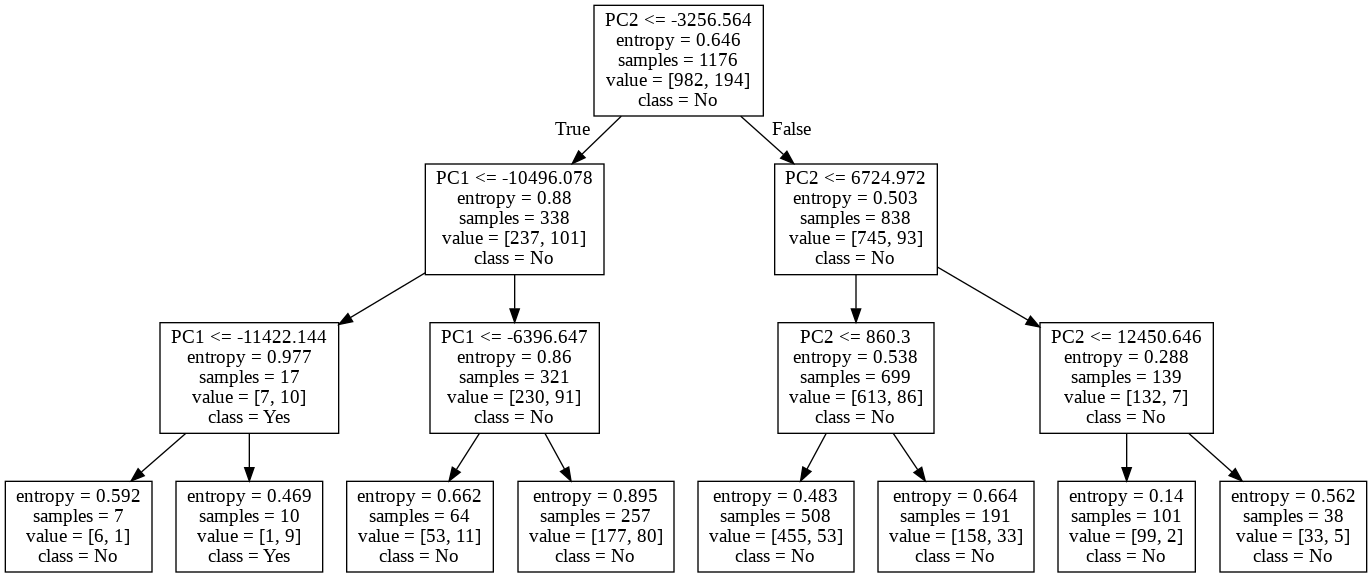

In [ ]:
Image('decision_tree_best.png')

## K Fold Cross Validation

In [ ]:
def cross_validation(model, X, y, my_cv = 5):
  scores = cross_validate(model, X, y, cv=my_cv, scoring=('accuracy','precision','recall','f1'))
  print(scores)
  print("Accuracy: ", np.mean(scores['test_accuracy']))
  print("Precision: ", np.mean(scores['test_precision']))
  print("Recall: ", np.mean(scores['test_recall']))
  print("F1 Score: ", np.mean(scores['test_f1']))

### Performing K Fold Cross Validation with above Hyperparameters

In [ ]:
cross_validation(DecisionTreeClassifier(**best_params_raw), X, Y, 5)

{'fit_time': array([0.00965381, 0.0069921 , 0.00293756, 0.00275898, 0.00282049]), 'score_time': array([0.0128231 , 0.00471115, 0.00359416, 0.00385594, 0.0035851 ]), 'test_accuracy': array([0.82993197, 0.83673469, 0.83673469, 0.84353741, 0.84353741]), 'test_precision': array([0.25      , 0.5       , 0.33333333, 0.53333333, 0.52      ]), 'test_recall': array([0.02083333, 0.25      , 0.0212766 , 0.17021277, 0.27659574]), 'test_f1': array([0.03846154, 0.33333333, 0.04      , 0.25806452, 0.36111111])}
Accuracy:  0.8380952380952381
Precision:  0.42733333333333334
Recall:  0.1477836879432624
F1 Score:  0.206194099807003
